In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation import validation
from lib.util import helper

### Hyperparameter Tuning

This notebook performs hyperparamter tuning for the Prophet GAM model. Namely:
 - Changepoint prior scale: Loop through range of sensible values, record RMSE on in and out-of-sample predictions and send to postgreSQL
 - **Needs Added**: Seasonality prior scale, maximum fourier order value

 Hypothesis: Eventually, very large $\tau$ values will result in an increase in out-of-sample RMSE and decrease in in-sample RMSE (aka overfitting)

In [2]:
seasonality_regressor = {
    'name': 'hour',
    'period': 1/24,
    'fourier_order': 20 ## upper bound of fourier order (b/c of hyperparameter)????
}

## seasonality prior scale???? this hyperparameter needs to be added

In [ ]:
tau_prior = list(np.arange(0.05, 10, 0.05))

validation.gam_model(
    min_train_date='2021-10-11',
    end_train_date='2021-10-14',
    end_test_date='2021-10-15',
    tables=['xl106_druckmaschine_5T'],
    tau_prior=tau_prior,
    add_seasonality=seasonality_regressor,
    update_score=True
)

In [2]:
query = """select * from sensors.metrics"""
metrics = helper.query_table(add_params=query)

### Varying $\tau$ values: out vs. in sample RMSE 

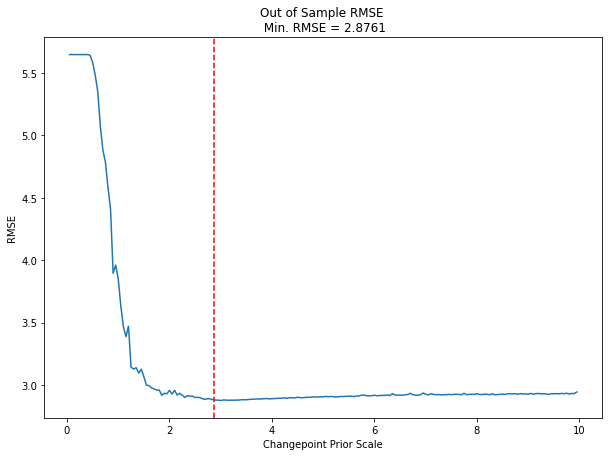

In [24]:
min_rmse = np.min(metrics.out_sample_rmse)

plt.figure(figsize=(10, 7))
plt.plot(metrics.tau, metrics.out_sample_rmse)
plt.title('Out of Sample RMSE \n Min. RMSE = {}'.format(round(min_rmse, 4)))
plt.xlabel('Changepoint Prior Scale')
plt.ylabel('RMSE')
plt.axvline(x=min_rmse, linestyle='--', color='red')
plt.show()

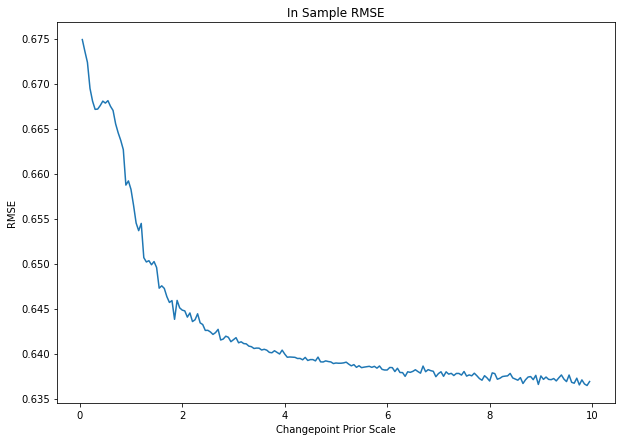

In [18]:
plt.figure(figsize=(10, 7))
plt.plot(metrics.tau, metrics.in_sample_rmse)
plt.title('In Sample RMSE')
plt.xlabel('Changepoint Prior Scale')
plt.ylabel('RMSE')
plt.show()